# Chapter 2: NSF-Awards

In [7]:
import requests
import zipfile  
import io
import os
import json
import pandas as pd

data_dir = '../../data'

## Get the data

In [ ]:
# URL for the 2024 NSF awards data

awards_url = "https://www.nsf.gov/awardsearch/download?DownloadFileName=2024&All=true&isJson=true"

# Download the zip file from the URL
response = requests.get(awards_url)
with open("awards.zip", "wb") as f:
    f.write(response.content)

print("zip file downloaded")

# Unzip the file
with zipfile.ZipFile("awards.zip", "r") as zip_ref:
    zip_ref.extractall("awards")

print("zip file unzipped")

# Read all json files from the unzipped folder into a single DataFrame using the Pandas normalize_json function
def read_json_files(folder_path):
    dataframes = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            with open(os.path.join(folder_path, filename), 'r') as f:
                data = json.load(f)
                df = pd.json_normalize(data)
                dataframes.append(df)
    # Concatenate all DataFrames into a single DataFrame, resetting the index before returning
    return pd.concat(dataframes, ignore_index=True)

print("Reading JSON files into DataFrame...")

# Read the JSON files into a DataFrame
awards_df = read_json_files("awards")

print("DataFrame created")

zip file downloaded
zip file unzipped
Reading JSON files into DataFrame...
DataFrame created


### Save and restore the DataFrame

In [ ]:
awards_df.to_pickle('awards_data.pkl')

In [5]:
awards_df = pd.read_pickle('awards_data.pkl')

## Examine and clean the data

### Display the data

In [ ]:
awards_df

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,CA,California,920930210,US,50,CA50,United States,1,NaN,NaN
2,2142914,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,FL,Florida,336172008,US,15,FL15,United States,1,NaN,NaN
3,2153481,NSF,CoopAgrmnt,Cooperative Agreement,Mid-Scale RI-2: SafeInsights: A National Resea...,47.076,11040000,7032922321,anixon@nsf.gov,Andrea Nixon,...,TX,Texas,770051827,US,09,TX09,United States,1,NaN,NaN
4,2212209,NSF,Grant,Standard Grant,SBIR Phase I: Set Point Solutions - Safeguard...,47.084,15030000,7032925198,pchundi@nsf.gov,Parvathi Chundi,...,GU,Guam,96913,US,00,GU00,United States,1,"<div class=""porColContainerWBG"">\n<div class=""...",\n\n \r\n\n\nSet Point Solutions\r\n\n\nPARROT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11682,2450793,NSF,Grant,Standard Grant,Neutron Stars and Gravitational Waves from LIG...,47.049,03010000,7032927372,pmarrone@nsf.gov,Pedro Marronetti,...,MD,Maryland,212500001,US,07,MD07,United States,1,NaN,NaN
11683,2451193,NSF,Grant,Standard Grant,LEAPS-MPS: Deep Quasi-Reversibility Inversion ...,"47.049, 47.083",03040000,7032927021,ewilmer@nsf.gov,Elizabeth Wilmer,...,TX,Texas,79409,US,19,TX19,United States,1,NaN,NaN
11684,2451358,NSF,Grant,Standard Grant,Flow Dynamics in Buoyancy-Driven Variable-Dens...,"47.041, 47.083",07020000,7032927030,rjoslin@nsf.gov,Ron Joslin,...,CO,Colorado,804011887,US,07,CO07,United States,1,NaN,NaN
11685,2451487,NSF,Grant,Continuing Grant,Probabilistic Models with Boundary: Symmetries...,47.049,03040000,7032927021,ewilmer@nsf.gov,Elizabeth Wilmer,...,OH,Ohio,432101016,US,03,OH03,United States,1,NaN,NaN


In [ ]:
awards_df.head()

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,CA,California,920930210,US,50,CA50,United States,1,NaN,NaN
2,2142914,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,FL,Florida,336172008,US,15,FL15,United States,1,NaN,NaN
3,2153481,NSF,CoopAgrmnt,Cooperative Agreement,Mid-Scale RI-2: SafeInsights: A National Resea...,47.076,11040000,7032922321,anixon@nsf.gov,Andrea Nixon,...,TX,Texas,770051827,US,09,TX09,United States,1,NaN,NaN
4,2212209,NSF,Grant,Standard Grant,SBIR Phase I: Set Point Solutions - Safeguard...,47.084,15030000,7032925198,pchundi@nsf.gov,Parvathi Chundi,...,GU,Guam,96913,US,00,GU00,United States,1,"<div class=""porColContainerWBG"">\n<div class=""...",\n\n \r\n\n\nSet Point Solutions\r\n\n\nPARROT...


In [ ]:
awards_df.tail(3)

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
11684,2451358,NSF,Grant,Standard Grant,Flow Dynamics in Buoyancy-Driven Variable-Dens...,"47.041, 47.083",07020000,7032927030,rjoslin@nsf.gov,Ron Joslin,...,CO,Colorado,804011887,US,07,CO07,United States,1,NaN,NaN
11685,2451487,NSF,Grant,Continuing Grant,Probabilistic Models with Boundary: Symmetries...,47.049,03040000,7032927021,ewilmer@nsf.gov,Elizabeth Wilmer,...,OH,Ohio,432101016,US,03,OH03,United States,1,NaN,NaN
11686,2451990,NSF,Grant,Standard Grant,Collaborative Research: Scaling of ciliary flo...,47.041,07020000,7032927030,rjoslin@nsf.gov,Ron Joslin,...,OH,Ohio,441061712,US,11,OH11,United States,1,NaN,NaN


In [ ]:
display(awards_df)

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,CA,California,920930210,US,50,CA50,United States,1,NaN,NaN
2,2142914,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,FL,Florida,336172008,US,15,FL15,United States,1,NaN,NaN
3,2153481,NSF,CoopAgrmnt,Cooperative Agreement,Mid-Scale RI-2: SafeInsights: A National Resea...,47.076,11040000,7032922321,anixon@nsf.gov,Andrea Nixon,...,TX,Texas,770051827,US,09,TX09,United States,1,NaN,NaN
4,2212209,NSF,Grant,Standard Grant,SBIR Phase I: Set Point Solutions - Safeguard...,47.084,15030000,7032925198,pchundi@nsf.gov,Parvathi Chundi,...,GU,Guam,96913,US,00,GU00,United States,1,"<div class=""porColContainerWBG"">\n<div class=""...",\n\n \r\n\n\nSet Point Solutions\r\n\n\nPARROT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11682,2450793,NSF,Grant,Standard Grant,Neutron Stars and Gravitational Waves from LIG...,47.049,03010000,7032927372,pmarrone@nsf.gov,Pedro Marronetti,...,MD,Maryland,212500001,US,07,MD07,United States,1,NaN,NaN
11683,2451193,NSF,Grant,Standard Grant,LEAPS-MPS: Deep Quasi-Reversibility Inversion ...,"47.049, 47.083",03040000,7032927021,ewilmer@nsf.gov,Elizabeth Wilmer,...,TX,Texas,79409,US,19,TX19,United States,1,NaN,NaN
11684,2451358,NSF,Grant,Standard Grant,Flow Dynamics in Buoyancy-Driven Variable-Dens...,"47.041, 47.083",07020000,7032927030,rjoslin@nsf.gov,Ron Joslin,...,CO,Colorado,804011887,US,07,CO07,United States,1,NaN,NaN
11685,2451487,NSF,Grant,Continuing Grant,Probabilistic Models with Boundary: Symmetries...,47.049,03040000,7032927021,ewilmer@nsf.gov,Elizabeth Wilmer,...,OH,Ohio,432101016,US,03,OH03,United States,1,NaN,NaN


In [ ]:
with pd.option_context(
    'display.max_rows', 5,
    'display.max_columns', None):
    display(awards_df)

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,awd_eff_date,awd_exp_date,tot_intn_awd_amt,awd_amount,awd_min_amd_letter_date,awd_max_amd_letter_date,awd_abstract_narration,awd_arra_amount,dir_abbr,org_dir_long_name,div_abbr,org_div_long_name,awd_agcy_code,fund_agcy_code,pi,pgm_ele,pgm_ref,app_fund,oblg_fy,por,inst.inst_name,inst.inst_street_address,inst.inst_street_address_2,inst.inst_city_name,inst.inst_state_code,inst.inst_state_name,inst.inst_phone_num,inst.inst_zip_code,inst.inst_country_name,inst.cong_dist_code,inst.st_cong_dist_code,inst.org_lgl_bus_name,inst.org_prnt_uei_num,inst.org_uei_num,perf_inst.perf_inst_name,perf_inst.perf_str_addr,perf_inst.perf_city_name,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,2024-09-01,2028-08-31,654564.0,734554.0,2024-08-21,2025-04-09,Non-technical description\r\nMarine invertebra...,0.0,GEO,Directorate for Geosciences,OPP,Office of Polar Programs (OPP),4900,4900,"[{'pi_role': 'Principal Investigator', 'pi_fir...","[{'pgm_ele_code': '511100', 'pgm_ele_name': 'A...","[{'pgm_ref_code': '1167', 'pgm_ref_txt': 'MULT...","[{'app_code': '', 'app_name': '', 'app_symb_id...","[{'fund_oblg_fiscal_yr': 2024, 'fund_oblg_amt'...",None,"Nevada System of Higher Education, Desert Rese...",2215 RAGGIO PKWY,,RENO,NV,Nevada,7756737300,895121095,United States,02,NV02,NEVADA SYSTEM OF HIGHER EDUCATION,MV1JFXA4S621,MV1JFXA4S621,"Nevada System of Higher Education, Desert Rese...",2215 Raggio Parkway,Reno,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,2024-09-01,2028-08-31,411920.0,411920.0,2024-08-21,2024-08-21,Non-technical description\r\nMarine invertebra...,0.0,GEO,Directorate for Geosciences,OPP,Office of Polar Programs (OPP),4900,4900,"[{'pi_role': 'Principal Investigator', 'pi_fir...","[{'pgm_ele_code': '511100', 'pgm_ele_name': 'A...","[{'pgm_ref_code': '1167', 'pgm_ref_txt': 'MULT...","[{'app_code': '', 'app_name': '', 'app_symb_id...","[{'fund_oblg_fiscal_yr': 2024, 'fund_oblg_amt'...",None,University of California-San Diego Scripps Ins...,8622 DISCOVERY WAY # 116,,LA JOLLA,CA,California,8585341293,920931500,United States,50,CA50,UNIVERSITY OF CALIFORNIA SAN DIEGO,QJ8HMDK7MRM3,QJ8HMDK7MRM3,UCSD Scripps Inst of Oceanography,9500 Gilman Dr. #0210,LA JOLLA,CA,California,920930210,US,50,CA50,United States,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11685,2451487,NSF,Grant,Continuing Grant,Probabilistic Models with Boundary: Symmetries...,47.049,03040000,7032927021,ewilmer@nsf.gov,Elizabeth Wilmer,2024-09-01,2027-05-31,176335.0,38376.0,2024-09-19,2024-09-19,A major goal of modern probability is to under...,0.0,MPS,Directorate for Mathematical and Physical Scie...,DMS,Division Of Mathematical Sciences,4900,4900,"[{'pi_role': 'Principal Investigator', 'pi_fir...","[{'pgm_ele_code': '126300', 'pgm_ele_name': 'P...",None,"[{'app_code': '', 'app_name': '', 'app_symb_id...","[{'fund_oblg_fiscal_yr': 2024, 'fund_oblg_amt'...",None,Ohio State University,1960 KENNY RD,,COLUMBUS,OH,Ohio,6146888735,432101016,United States,03,OH03,"OHIO STATE UNIVERSITY, THE",MN4MDDMN8529,DLWBSLWAJWR1,Ohio State University,1960 KENNY RD,COLUMBUS,OH,Ohio,432101016,US,03,OH03,United States,1,NaN,NaN
11686,2451990,NSF,Grant,Standard Grant,Collaborative Research: Scaling of ciliary flo...,47.041,07020000,7032927030,rjoslin

### Display the DataFrame attributes

In [ ]:
awards_df.values

array([['2142912', 'NSF', 'Grant', ..., '1', nan, nan],
       ['2142913', 'NSF', 'Grant', ..., '1', nan, nan],
       ['2142914', 'NSF', 'Grant', ..., '1', nan, nan],
       ...,
       ['2451358', 'NSF', 'Grant', ..., '1', nan, nan],
       ['2451487', 'NSF', 'Grant', ..., '1', nan, nan],
       ['2451990', 'NSF', 'Grant', ..., '1', nan, nan]], dtype=object)

In [ ]:
print("Index:  ", awards_df.index)
print("Columns:", awards_df.columns)
print("Size:   ", awards_df.size)
print("Shape:  ", awards_df.shape)

Index:   RangeIndex(start=0, stop=11687, step=1)
Columns: Index(['awd_id', 'agcy_id', 'tran_type', 'awd_istr_txt', 'awd_titl_txt',
       'cfda_num', 'org_code', 'po_phone', 'po_email', 'po_sign_block_name',
       'awd_eff_date', 'awd_exp_date', 'tot_intn_awd_amt', 'awd_amount',
       'awd_min_amd_letter_date', 'awd_max_amd_letter_date',
       'awd_abstract_narration', 'awd_arra_amount', 'dir_abbr',
       'org_dir_long_name', 'div_abbr', 'org_div_long_name', 'awd_agcy_code',
       'fund_agcy_code', 'pi', 'pgm_ele', 'pgm_ref', 'app_fund', 'oblg_fy',
       'por', 'inst.inst_name', 'inst.inst_street_address',
       'inst.inst_street_address_2', 'inst.inst_city_name',
       'inst.inst_state_code', 'inst.inst_state_name', 'inst.inst_phone_num',
       'inst.inst_zip_code', 'inst.inst_country_name', 'inst.cong_dist_code',
       'inst.st_cong_dist_code', 'inst.org_lgl_bus_name',
       'inst.org_prnt_uei_num', 'inst.org_uei_num', 'perf_inst.perf_inst_name',
       'perf_inst.perf_str

### Use the columns attribute to change the column names

In [4]:
awards_df.columns = awards_df.columns.str.replace(".", ":")

In [5]:
print(awards_df.columns)

Index(['awd_id', 'agcy_id', 'tran_type', 'awd_istr_txt', 'awd_titl_txt',
       'cfda_num', 'org_code', 'po_phone', 'po_email', 'po_sign_block_name',
       'awd_eff_date', 'awd_exp_date', 'tot_intn_awd_amt', 'awd_amount',
       'awd_min_amd_letter_date', 'awd_max_amd_letter_date',
       'awd_abstract_narration', 'awd_arra_amount', 'dir_abbr',
       'org_dir_long_name', 'div_abbr', 'org_div_long_name', 'awd_agcy_code',
       'fund_agcy_code', 'pi', 'pgm_ele', 'pgm_ref', 'app_fund', 'oblg_fy',
       'por', 'inst:inst_name', 'inst:inst_street_address',
       'inst:inst_street_address_2', 'inst:inst_city_name',
       'inst:inst_state_code', 'inst:inst_state_name', 'inst:inst_phone_num',
       'inst:inst_zip_code', 'inst:inst_country_name', 'inst:cong_dist_code',
       'inst:st_cong_dist_code', 'inst:org_lgl_bus_name',
       'inst:org_prnt_uei_num', 'inst:org_uei_num', 'perf_inst:perf_inst_name',
       'perf_inst:perf_str_addr', 'perf_inst:perf_city_name',
       'perf_inst:perf

In [6]:
# Change it back :-)
awards_df.columns = awards_df.columns.str.replace(":", ".")

In [7]:
awards_df.head()

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,CA,California,920930210,US,50,CA50,United States,1,NaN,NaN
2,2142914,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,FL,Florida,336172008,US,15,FL15,United States,1,NaN,NaN
3,2153481,NSF,CoopAgrmnt,Cooperative Agreement,Mid-Scale RI-2: SafeInsights: A National Resea...,47.076,11040000,7032922321,anixon@nsf.gov,Andrea Nixon,...,TX,Texas,770051827,US,09,TX09,United States,1,NaN,NaN
4,2212209,NSF,Grant,Standard Grant,SBIR Phase I: Set Point Solutions - Safeguard...,47.084,15030000,7032925198,pchundi@nsf.gov,Parvathi Chundi,...,GU,Guam,96913,US,00,GU00,United States,1,"<div class=""porColContainerWBG"">\n<div class=""...",\n\n \r\n\n\nSet Point Solutions\r\n\n\nPARROT...


### Use the info(), nunique(), and describe() methods

In [8]:
awards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11687 entries, 0 to 11686
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   awd_id                       11687 non-null  object 
 1   agcy_id                      11687 non-null  object 
 2   tran_type                    11687 non-null  object 
 3   awd_istr_txt                 11687 non-null  object 
 4   awd_titl_txt                 11687 non-null  object 
 5   cfda_num                     11687 non-null  object 
 6   org_code                     11687 non-null  object 
 7   po_phone                     11597 non-null  object 
 8   po_email                     11687 non-null  object 
 9   po_sign_block_name           11687 non-null  object 
 10  awd_eff_date                 11687 non-null  object 
 11  awd_exp_date                 11687 non-null  object 
 12  tot_intn_awd_amt             11687 non-null  float64
 13  awd_amount      

In [9]:
awards_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11687 entries, 0 to 11686
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   awd_id                       11687 non-null  object 
 1   agcy_id                      11687 non-null  object 
 2   tran_type                    11687 non-null  object 
 3   awd_istr_txt                 11687 non-null  object 
 4   awd_titl_txt                 11687 non-null  object 
 5   cfda_num                     11687 non-null  object 
 6   org_code                     11687 non-null  object 
 7   po_phone                     11597 non-null  object 
 8   po_email                     11687 non-null  object 
 9   po_sign_block_name           11687 non-null  object 
 10  awd_eff_date                 11687 non-null  object 
 11  awd_exp_date                 11687 non-null  object 
 12  tot_intn_awd_amt             11687 non-null  float64
 13  awd_amount      

In [47]:
# Number of unique values in each of the first 24 columns
awards_df.iloc[:, :24].nunique()

awd_id                     11687
agcy_id                        1
tran_type                      2
awd_istr_txt                   5
awd_titl_txt                9831
cfda_num                     110
org_code                      58
po_phone                     534
po_email                     564
po_sign_block_name           593
awd_eff_date                  42
awd_exp_date                  87
tot_intn_awd_amt            7805
awd_amount                  8352
awd_min_amd_letter_date      273
awd_max_amd_letter_date      420
awd_abstract_narration      9928
awd_arra_amount                1
dir_abbr                       9
org_dir_long_name              9
div_abbr                      38
org_div_long_name             38
awd_agcy_code                  1
fund_agcy_code                 1
dtype: int64

In [16]:
awards_df.describe()

,tot_intn_awd_amt,awd_amount,awd_arra_amount
count,1.168700e+04,1.168700e+04,11687.0
mean,6.849670e+05,4.648892e+05,0.0
std,5.116340e+06,1.409821e+06,0.0
min,1.400000e+03,0.000000e+00,0.0
25%,1.999265e+05,1.552325e+05,0.0
50%,3.688220e+05,2.998320e+05,0.0
75%,5.998045e+05,5.039940e+05,0.0
max,4.574480e+08,1.010000e+08,0.0


In [17]:
awards_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tot_intn_awd_amt,11687.0,684967.014888,5.116340e+06,1400.0,199926.5,368822.0,599804.5,457447968.0
awd_amount,11687.0,464889.213827,1.409821e+06,0.0,155232.5,299832.0,503994.0,101000000.0
awd_arra_amount,11687.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0


### Save and restore the cleaned DataFrame

In [18]:
awards_df.to_pickle('awards_cleaned.pkl')

In [19]:
awards_df = pd.read_pickle('awards_cleaned.pkl')
awards_df.head()

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,CA,California,920930210,US,50,CA50,United States,1,NaN,NaN
2,2142914,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,FL,Florida,336172008,US,15,FL15,United States,1,NaN,NaN
3,2153481,NSF,CoopAgrmnt,Cooperative Agreement,Mid-Scale RI-2: SafeInsights: A National Resea...,47.076,11040000,7032922321,anixon@nsf.gov,Andrea Nixon,...,TX,Texas,770051827,US,09,TX09,United States,1,NaN,NaN
4,2212209,NSF,Grant,Standard Grant,SBIR Phase I: Set Point Solutions - Safeguard...,47.084,15030000,7032925198,pchundi@nsf.gov,Parvathi Chundi,...,GU,Guam,96913,US,00,GU00,United States,1,"<div class=""porColContainerWBG"">\n<div class=""...",\n\n \r\n\n\nSet Point Solutions\r\n\n\nPARROT...


## Access the data

### How to access columns

In [20]:
awards_df.agcy_id.head()

0    NSF
1    NSF
2    NSF
3    NSF
4    NSF
Name: agcy_id, dtype: object

In [21]:
type(awards_df.agcy_id)

pandas.core.series.Series

In [22]:
awards_df['awd_titl_txt'].head(2)

0    Collaborative Research: ANT LIA: Diving into t...
1    Collaborative Research: ANT LIA: Diving into t...
Name: awd_titl_txt, dtype: object

In [23]:
type(awards_df['awd_titl_txt'])

pandas.core.series.Series

In [24]:
awards_df[['awd_eff_date','awd_titl_txt']].head(2)

,awd_eff_date,awd_titl_txt
0,2024-09-01,Collaborative Research: ANT LIA: Diving into t...
1,2024-09-01,Collaborative Research: ANT LIA: Diving into t...


In [25]:
type(awards_df[['awd_eff_date','awd_titl_txt']])

pandas.core.frame.DataFrame

### How to access rows

In [26]:
awards_df.query('dir_abbr=="GEO"')

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,CA,California,920930210,US,50,CA50,United States,1,NaN,NaN
2,2142914,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,FL,Florida,336172008,US,15,FL15,United States,1,NaN,NaN
27,2242842,NSF,Grant,Standard Grant,GP-UP: Strengthening the Geo-STEM Learning Eco...,47.050,06010000,7032924713,mbjones@nsf.gov,Brandon Jones,...,OR,Oregon,973611329,US,05,OR05,United States,1,NaN,NaN
29,2245648,NSF,Grant,Standard Grant,GP-IN: Communities Of Aquatic Sciences in Teac...,"47.050, 47.076",06010000,7032924713,mbjones@nsf.gov,Brandon Jones,...,NY,New York,128664310,US,20,NY20,United States,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11619,2446211,NSF,Grant,Continuing Grant,United States Representation in the Internatio...,47.078,06090100,7032927432,colstraw@nsf.gov,Colleen Strawhacker,...,CO,Colorado,803090001,US,02,CO02,United States,1,NaN,NaN
11626,2446763,NSF,Grant,Standard Grant,Collaborative Research: Calibration of Raman S...,47.050,06030000,7032920000,yyanes@nsf.gov,Yurena Yanes,...,LA,Louisiana,701185665,US,01,LA01,United States,1,NaN,NaN
11642,2448002,NSF,Grant,Standard Grant,OCE-PRF: Structural controls on fault slip beh...,47.050,06040000,7032924344,tjcrone@nsf.gov,Timothy Crone,...,ID,Idaho,837250001,US,02,ID02,United States,1,NaN,NaN
11660,2449188,NSF,Grant,Continuing Grant,Collaborative Research: Quantitative Paleoclim...,47.050,06030000,7032924725,jwynn@nsf.gov,Jonathan G Wynn,...,MN,Minnesota,554552009,US,05,MN05,United States,1,NaN,NaN


In [27]:
awards_df.query('dir_abbr=="GEO" and `inst.inst_state_code` != "CA"')

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
2,2142914,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,FL,Florida,336172008,US,15,FL15,United States,1,NaN,NaN
27,2242842,NSF,Grant,Standard Grant,GP-UP: Strengthening the Geo-STEM Learning Eco...,47.050,06010000,7032924713,mbjones@nsf.gov,Brandon Jones,...,OR,Oregon,973611329,US,05,OR05,United States,1,NaN,NaN
29,2245648,NSF,Grant,Standard Grant,GP-IN: Communities Of Aquatic Sciences in Teac...,"47.050, 47.076",06010000,7032924713,mbjones@nsf.gov,Brandon Jones,...,NY,New York,128664310,US,20,NY20,United States,1,NaN,NaN
31,2247395,NSF,Grant,Standard Grant,Collaborative Research: GEM: Propagation and D...,47.050,06020000,7032928466,vjordano@nsf.gov,Vania Jordanova,...,MI,Michigan,491031400,US,05,MI05,United States,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11619,2446211,NSF,Grant,Continuing Grant,United States Representation in the Internatio...,47.078,06090100,7032927432,colstraw@nsf.gov,Colleen Strawhacker,...,CO,Colorado,803090001,US,02,CO02,United States,1,NaN,NaN
11626,2446763,NSF,Grant,Standard Grant,Collaborative Research: Calibration of Raman S...,47.050,06030000,7032920000,yyanes@nsf.gov,Yurena Yanes,...,LA,Louisiana,701185665,US,01,LA01,United States,1,NaN,NaN
11642,2448002,NSF,Grant,Standard Grant,OCE-PRF: Structural controls on fault slip beh...,47.050,06040000,7032924344,tjcrone@nsf.gov,Timothy Crone,...,ID,Idaho,837250001,US,02,ID02,United States,1,NaN,NaN
11660,2449188,NSF,Grant,Continuing Grant,Collaborative Research: Quantitative Paleoclim...,47.050,06030000,7032924725,jwynn@nsf.gov,Jonathan G Wynn,...,MN,Minnesota,554552009,US,05,MN05,United States,1,NaN,NaN


In [28]:
# use backticks if a column name contains spaces or special characters
# awards_data.query('dir_abbr=="GEO" and `inst.inst_state_code` != "CA"')

In [29]:
awards_df.query('`inst.inst_state_code` == "CA" or `inst.inst_state_code` == "WA"').head()

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,CA,California,920930210,US,50,CA50,United States,1,NaN,NaN
8,2222588,NSF,CoopAgrmnt,Cooperative Agreement,SBIR Phase II: Rechargeable Carbon-Oxygen Bat...,47.084,15030000,7032924506,marschin@nsf.gov,Mara E. Schindelholz,...,CA,California,943011707,US,16,CA16,United States,1,NaN,NaN
23,2242605,NSF,Grant,Standard Grant,Advancing Earthquake Engineering of Cast-in-Pl...,47.041,07030000,7032927024,jpauschk@nsf.gov,Joy Pauschke,...,WA,Washington,981950001,US,07,WA07,United States,1,NaN,NaN
26,2242767,NSF,Grant,Standard Grant,Multimodal Disaster Impact Assessment Models f...,47.041,07030000,7032927024,jpauschk@nsf.gov,Joy Pauschke,...,CA,California,900951593,US,36,CA36,United States,1,NaN,NaN
30,2247311,NSF,Grant,Standard Grant,Advancing Cybersecurity Education in Collabora...,47.076,11040100,7032924625,chovis@nsf.gov,R. Corby Hovis,...,CA,California,928011819,US,46,CA46,United States,1,NaN,NaN


### How to access a subset of rows and columns

In [ ]:
# using the query method
awards_df.query('dir_abbr=="GEO"').awd_titl_txt.head()

0     Collaborative Research: ANT LIA: Diving into t...
1     Collaborative Research: ANT LIA: Diving into t...
2     Collaborative Research: ANT LIA: Diving into t...
27    GP-UP: Strengthening the Geo-STEM Learning Eco...
29    GP-IN: Communities Of Aquatic Sciences in Teac...
Name: awd_titl_txt, dtype: object

In [ ]:
# using a boolean mask
awards_df[awards_df['dir_abbr'] == "GEO"].awd_titl_txt.head()

0     Collaborative Research: ANT LIA: Diving into t...
1     Collaborative Research: ANT LIA: Diving into t...
2     Collaborative Research: ANT LIA: Diving into t...
27    GP-UP: Strengthening the Geo-STEM Learning Eco...
29    GP-IN: Communities Of Aquatic Sciences in Teac...
Name: awd_titl_txt, dtype: object

In [33]:
awards_df.query('dir_abbr=="GEO"')['awd_titl_txt'].head()

0     Collaborative Research: ANT LIA: Diving into t...
1     Collaborative Research: ANT LIA: Diving into t...
2     Collaborative Research: ANT LIA: Diving into t...
27    GP-UP: Strengthening the Geo-STEM Learning Eco...
29    GP-IN: Communities Of Aquatic Sciences in Teac...
Name: awd_titl_txt, dtype: object

In [34]:
awards_df.query('dir_abbr=="GEO"')[['awd_titl_txt']].head()

,awd_titl_txt
0,Collaborative Research: ANT LIA: Diving into t...
1,Collaborative Research: ANT LIA: Diving into t...
2,Collaborative Research: ANT LIA: Diving into t...
27,GP-UP: Strengthening the Geo-STEM Learning Eco...
29,GP-IN: Communities Of Aquatic Sciences in Teac...


In [35]:
awards_df.query('dir_abbr=="GEO"')[['awd_titl_txt','po_email']].head()

,awd_titl_txt,po_email
0,Collaborative Research: ANT LIA: Diving into t...,rgast@nsf.gov
1,Collaborative Research: ANT LIA: Diving into t...,rgast@nsf.gov
2,Collaborative Research: ANT LIA: Diving into t...,rgast@nsf.gov
27,GP-UP: Strengthening the Geo-STEM Learning Eco...,mbjones@nsf.gov
29,GP-IN: Communities Of Aquatic Sciences in Teac...,mbjones@nsf.gov


### How to access rows with the loc[] accessor

In [36]:
awards_df.loc[[0,5,10]]

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
5,2220301,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...,47.049,03040000,7032924885,tbartosz@nsf.gov,Tomek Bartoszynski,...,IA,Iowa,500112103,US,04,IA04,United States,1,NaN,NaN
10,2226026,NSF,CoopAgrmnt,Cooperative Agreement,SBIR Phase II: Zero Trust Solution for Precis...,47.084,15030000,7032928772,patherto@nsf.gov,Peter Atherton,...,MD,Maryland,212284851,US,07,MD07,United States,1,NaN,NaN


In [37]:
awards_df.loc[4:6]

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
4,2212209,NSF,Grant,Standard Grant,SBIR Phase I: Set Point Solutions - Safeguard...,47.084,15030000,7032925198,pchundi@nsf.gov,Parvathi Chundi,...,GU,Guam,96913,US,00,GU00,United States,1,"<div class=""porColContainerWBG"">\n<div class=""...",\n\n \r\n\n\nSet Point Solutions\r\n\n\nPARROT...
5,2220301,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...,47.049,03040000,7032924885,tbartosz@nsf.gov,Tomek Bartoszynski,...,IA,Iowa,500112103,US,04,IA04,United States,1,NaN,NaN
6,2220304,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...,47.049,03040000,7032924885,tbartosz@nsf.gov,Tomek Bartoszynski,...,OH,Ohio,432191016,US,03,OH03,United States,1,NaN,NaN


In [38]:
awards_df.loc[0:20:5]

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
5,2220301,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...,47.049,03040000,7032924885,tbartosz@nsf.gov,Tomek Bartoszynski,...,IA,Iowa,500112103,US,04,IA04,United States,1,NaN,NaN
10,2226026,NSF,CoopAgrmnt,Cooperative Agreement,SBIR Phase II: Zero Trust Solution for Precis...,47.084,15030000,7032928772,patherto@nsf.gov,Peter Atherton,...,MD,Maryland,212284851,US,07,MD07,United States,1,NaN,NaN
15,2234346,NSF,Grant,Standard Grant,PFI-RP: Use of Augmented Reality and Electroen...,47.084,15030000,7032927529,smiqbal@nsf.gov,Samir M. Iqbal,...,PA,Pennsylvania,152600001,US,12,PA12,United States,1,NaN,NaN
20,2242572,NSF,Grant,Standard Grant,Enhancing Coastal Resilience through Participa...,47.041,07030000,7032922339,gibiscon@nsf.gov,Giovanna Biscontin,...,NC,North Carolina,27607,US,02,NC02,United States,1,NaN,NaN


In [39]:
awards_df.loc[awards_df.dir_abbr=="GEO"]

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,CA,California,920930210,US,50,CA50,United States,1,NaN,NaN
2,2142914,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,FL,Florida,336172008,US,15,FL15,United States,1,NaN,NaN
27,2242842,NSF,Grant,Standard Grant,GP-UP: Strengthening the Geo-STEM Learning Eco...,47.050,06010000,7032924713,mbjones@nsf.gov,Brandon Jones,...,OR,Oregon,973611329,US,05,OR05,United States,1,NaN,NaN
29,2245648,NSF,Grant,Standard Grant,GP-IN: Communities Of Aquatic Sciences in Teac...,"47.050, 47.076",06010000,7032924713,mbjones@nsf.gov,Brandon Jones,...,NY,New York,128664310,US,20,NY20,United States,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11619,2446211,NSF,Grant,Continuing Grant,United States Representation in the Internatio...,47.078,06090100,7032927432,colstraw@nsf.gov,Colleen Strawhacker,...,CO,Colorado,803090001,US,02,CO02,United States,1,NaN,NaN
11626,2446763,NSF,Grant,Standard Grant,Collaborative Research: Calibration of Raman S...,47.050,06030000,7032920000,yyanes@nsf.gov,Yurena Yanes,...,LA,Louisiana,701185665,US,01,LA01,United States,1,NaN,NaN
11642,2448002,NSF,Grant,Standard Grant,OCE-PRF: Structural controls on fault slip beh...,47.050,06040000,7032924344,tjcrone@nsf.gov,Timothy Crone,...,ID,Idaho,837250001,US,02,ID02,United States,1,NaN,NaN
11660,2449188,NSF,Grant,Continuing Grant,Collaborative Research: Quantitative Paleoclim...,47.050,06030000,7032924725,jwynn@nsf.gov,Jonathan G Wynn,...,MN,Minnesota,554552009,US,05,MN05,United States,1,NaN,NaN


### How to access columns with the loc[] accessor

In [41]:
awards_df.loc[:, ['awd_id', 'div_abbr', 'awd_titl_txt']].head()

,awd_id,div_abbr,awd_titl_txt
0,2142912,OPP,Collaborative Research: ANT LIA: Diving into t...
1,2142913,OPP,Collaborative Research: ANT LIA: Diving into t...
2,2142914,OPP,Collaborative Research: ANT LIA: Diving into t...
3,2153481,DUE,Mid-Scale RI-2: SafeInsights: A National Resea...
4,2212209,TI,SBIR Phase I: Set Point Solutions - Safeguard...


### How to access a subset of rows and columns with the loc[] accessor

In [43]:
awards_df.loc[[0,5,10],['awd_id', 'div_abbr', 'awd_titl_txt']]

,awd_id,div_abbr,awd_titl_txt
0,2142912,OPP,Collaborative Research: ANT LIA: Diving into t...
5,2220301,DMS,Collaborative Research: ATD: Principled machin...
10,2226026,TI,SBIR Phase II: Zero Trust Solution for Precis...


In [48]:
awards_df.loc[4:6,'awd_id':'awd_titl_txt']

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt
4,2212209,NSF,Grant,Standard Grant,SBIR Phase I: Set Point Solutions - Safeguard...
5,2220301,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...
6,2220304,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...


### How to access rows with the iloc[] accessor

In [49]:
awards_df.iloc[[0,5,10]]

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
5,2220301,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...,47.049,03040000,7032924885,tbartosz@nsf.gov,Tomek Bartoszynski,...,IA,Iowa,500112103,US,04,IA04,United States,1,NaN,NaN
10,2226026,NSF,CoopAgrmnt,Cooperative Agreement,SBIR Phase II: Zero Trust Solution for Precis...,47.084,15030000,7032928772,patherto@nsf.gov,Peter Atherton,...,MD,Maryland,212284851,US,07,MD07,United States,1,NaN,NaN


In [50]:
awards_df.iloc[4:6]

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
4,2212209,NSF,Grant,Standard Grant,SBIR Phase I: Set Point Solutions - Safeguard...,47.084,15030000,7032925198,pchundi@nsf.gov,Parvathi Chundi,...,GU,Guam,96913,US,00,GU00,United States,1,"<div class=""porColContainerWBG"">\n<div class=""...",\n\n \r\n\n\nSet Point Solutions\r\n\n\nPARROT...
5,2220301,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...,47.049,03040000,7032924885,tbartosz@nsf.gov,Tomek Bartoszynski,...,IA,Iowa,500112103,US,04,IA04,United States,1,NaN,NaN


In [51]:
awards_df.iloc[0:20:5]

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,NV,Nevada,895121095,US,02,NV02,United States,1,NaN,NaN
5,2220301,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...,47.049,03040000,7032924885,tbartosz@nsf.gov,Tomek Bartoszynski,...,IA,Iowa,500112103,US,04,IA04,United States,1,NaN,NaN
10,2226026,NSF,CoopAgrmnt,Cooperative Agreement,SBIR Phase II: Zero Trust Solution for Precis...,47.084,15030000,7032928772,patherto@nsf.gov,Peter Atherton,...,MD,Maryland,212284851,US,07,MD07,United States,1,NaN,NaN
15,2234346,NSF,Grant,Standard Grant,PFI-RP: Use of Augmented Reality and Electroen...,47.084,15030000,7032927529,smiqbal@nsf.gov,Samir M. Iqbal,...,PA,Pennsylvania,152600001,US,12,PA12,United States,1,NaN,NaN


### How to access a subset of rows and columns with the iloc[] accessor

In [52]:
awards_df.iloc[[0,5,10],[1,2]]

,agcy_id,tran_type
0,NSF,Grant
5,NSF,Grant
10,NSF,CoopAgrmnt


In [53]:
awards_df.iloc[4:7,1:3]

,agcy_id,tran_type
4,NSF,Grant
5,NSF,Grant
6,NSF,Grant


In [54]:
awards_df.iloc[-10:]

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
11677,2450246,NSF,Grant,Continuing Grant,Collaborative Research : Improving the teachin...,47.076,11090000,7032928333,gesolomo@nsf.gov,Gregg Solomon,...,CO,Colorado,803090001,US,02,CO02,United States,1,NaN,NaN
11678,2450295,NSF,Grant,Standard Grant,Effective Strategies to Recruit Underserved St...,47.076,11060000,7032925121,msuiter@nsf.gov,Marilyn Suiter,...,IN,Indiana,479061332,US,04,IN04,United States,1,NaN,NaN
11679,2450312,NSF,Grant,Continuing Grant,Collaborative Research: Impacts of State Polic...,47.076,11090000,7032920000,jsinger@nsf.gov,Jonathan Singer,...,MO,Missouri,652113020,US,03,MO03,United States,1,NaN,NaN
11680,2450351,NSF,Grant,Continuing Grant,Development and Optimization of a Digital AC-D...,47.074,08080000,7032920000,erlyons@nsf.gov,Eric Lyons,...,AL,Alabama,368490001,US,03,AL03,United States,1,NaN,NaN
11681,2450662,NSF,Grant,Standard Grant,Collaborative Research: III: Medium: Towards E...,47.070,05020000,7032928111,ccyang@nsf.gov,Christopher Yang,...,TX,Texas,772043067,US,18,TX18,United States,1,NaN,NaN
11682,2450793,NSF,Grant,Standard Grant,Neutron Stars and Gravitational Waves from LIG...,47.049,03010000,7032927372,pmarrone@nsf.gov,Pedro Marronetti,...,MD,Maryland,212500001,US,07,MD07,United States,1,NaN,NaN
11683,2451193,NSF,Grant,Standard Grant,LEAPS-MPS: Deep Quasi-Reversibility Inversion ...,"47.049, 47.083",03040000,7032927021,ewilmer@nsf.gov,Elizabeth Wilmer,...,TX,Texas,79409,US,19,TX19,United States,1,NaN,NaN
11684,2451358,NSF,Grant,Standard Grant,Flow Dynamics in Buoyancy-Driven Variable-Dens...,"47.041, 47.083",07020000,7032927030,rjoslin@nsf.gov,Ron Joslin,...,CO,Colorado,804011887,US,07,CO07,United States,1,NaN,NaN
11685,2451487,NSF,Grant,Continuing Grant,Probabilistic Models with Boundary: Symmetries...,47.049,03040000,7032927021,ewilmer@nsf.gov,Elizabeth Wilmer,...,OH,Ohio,432101016,US,03,OH03,United States,1,NaN,NaN
11686,2451990,NSF,Grant,Standard Grant,Collaborative Research: Scaling of ciliary flo...,47.041,07020000,7032927030,rjoslin@nsf.gov,Ron Joslin,...,OH,Ohio,441061712,US,11,OH11,United States,1,NaN,NaN


## Prepare the data

### Sort the data

In [59]:
awards_df.sort_values('awd_amount', ascending=False)[['awd_id','awd_titl_txt','awd_amount']].head(10)

,awd_id,awd_titl_txt,awd_amount
287,2323116,Construction for the Leadership Class Computin...,101000000.0
89,2309200,Research Infrastructure: LIGO Laboratory Opera...,74181254.0
538,2330043,Research Infrastructure: Mid-scale RI-1 (MI:IP...,19999301.0
542,2330067,Research Infrastructure: Mid-scale RI-1 (M1:IP...,19998055.0
3,2153481,Mid-Scale RI-2: SafeInsights: A National Resea...,19116189.0
4022,2349693,Management and Operations of the Green Bank Ob...,16068385.0
5243,2403771,Center: SECURE - Collaborative Research Securi...,16024804.0
155,2315695,NSF Engines: Upstate New York Energy Storage E...,15000000.0
151,2315479,NSF Engines: Southwest Sustainability Innovati...,15000000.0
145,2315315,NSF Engines: North Dakota Advanced Agriculture...,15000000.0


In [65]:
awards_df.sort_values(['awd_eff_date','awd_amount'])[['awd_id','awd_titl_txt','awd_eff_date','awd_amount']].head(100)

,awd_id,awd_titl_txt,awd_eff_date,awd_amount
4739,2401696,Collaborative Research: Broadening Participati...,2023-10-01,914.0
6566,2409875,EAGER GERMINATION Collaborative Research: Leve...,2023-10-01,7459.0
4394,2400447,Equilibrium with Randomized Strategies in Lear...,2023-10-01,10946.0
10757,2432393,Collaborative Research: Conference: Dialogue a...,2023-10-01,12362.0
9561,2424335,CNS: Small: Data on the Edge: Leveraging Edge ...,2023-10-01,13733.0
...,...,...,...,...
5494,2404669,Collaborative Research: Intermediaries and Pro...,2023-10-01,138888.0
3088,2346091,Collaborative Research: Enabling Intelligent C...,2023-10-01,138986.0
7062,2412182,SPX: Collaborative Research: Intelligent Commu...,2023-10-01,139616.0
8553,2419155,"Collaborative Research: Phenobase: Community, ...",2023-10-01,140639.0


In [67]:
awards_df.sort_values(['awd_eff_date','awd_id'], ascending=[False,True])[['awd_id','awd_titl_txt','awd_eff_date','awd_amount']].head(10)

,awd_id,awd_titl_txt,awd_eff_date,awd_amount
6427,2409411,EMBRACE-OCE-Seed: Variability and trends in Ag...,2025-09-01,199999.0
6546,2409798,Postdoctoral Fellowship: PRFB: Mechanisms and ...,2025-09-01,240000.0
6624,2410118,Postdoctoral Fellowship: PRFB: Rules of Life: ...,2025-09-01,240000.0
9643,2424994,eMB: Collaborative Research: Reconstructing In...,2025-09-01,187133.0
4180,2350244,Collaborative Research: CAS-SC: Investigating ...,2025-08-15,131914.0
6638,2410208,Postdoctoral Fellowship: PRFB: Investigating p...,2025-08-01,240000.0
6675,2410425,Postdoctoral Fellowship: PRFB: Investigating F...,2025-08-01,240000.0
6681,2410506,Postdoctoral Fellowship: Do hotter climates pr...,2025-08-01,240000.0
7973,2416549,Collaborative Research: Spatial Variability in...,2025-08-01,246278.0
7974,2416550,Collaborative Research: Spatial Variability in...,2025-08-01,142723.0


In [68]:
awards_df.sort_values(['awd_eff_date','awd_id'], ascending=[True,False])[['awd_id','awd_titl_txt','awd_eff_date','awd_amount']].head(10)

,awd_id,awd_titl_txt,awd_eff_date,awd_amount
11625,2446761,Collaborative Research: Martensitic Transforma...,2023-10-01,221081.0
11610,2445412,Collaborative Research: Research Initiation: E...,2023-10-01,44763.0
11553,2444044,SCH: INT: Collaborative Research: Privacy-Pres...,2023-10-01,415235.0
11424,2438328,ANSWERS: Dynamics and Impacts of Electrons and...,2023-10-01,821262.0
11411,2438133,CAREER: Synthesizing Architectural Tactics,2023-10-01,290628.0
11366,2437784,CRII:SCH: Interactive Explainable Deep Surviva...,2023-10-01,155163.0
11280,2436906,CAREER: Discovering the Mechanisms Governing F...,2023-10-01,302155.0
11235,2436298,Collaborative Research: Direct Lending in the ...,2023-10-01,84112.0
11049,2434698,Collaborative Research: RUI: Trust but Verify:...,2023-10-01,211531.0
10909,2433611,CAREER: Understanding the Stabilizing Role of ...,2023-10-01,135991.0


### Apply statistical methods

In [69]:
awards_df.awd_amount.mean()

464889.2138273295

In [70]:
awards_df[['div_abbr','awd_amount']].max()

div_abbr               TI
awd_amount    101000000.0
dtype: object

In [71]:
awards_df.count()

awd_id                         11687
agcy_id                        11687
tran_type                      11687
awd_istr_txt                   11687
awd_titl_txt                   11687
cfda_num                       11687
org_code                       11687
po_phone                       11597
po_email                       11687
po_sign_block_name             11687
awd_eff_date                   11687
awd_exp_date                   11687
tot_intn_awd_amt               11687
awd_amount                     11687
awd_min_amd_letter_date        11687
awd_max_amd_letter_date        11687
awd_abstract_narration         11680
awd_arra_amount                11687
dir_abbr                       11687
org_dir_long_name              11687
div_abbr                       11687
org_div_long_name              11687
awd_agcy_code                  11687
fund_agcy_code                 11687
pi                             11687
pgm_ele                        11666
pgm_ref                         9928
a

In [74]:
awards_df[['tot_intn_awd_amt','awd_amount']].quantile([.1,.9])

,tot_intn_awd_amt,awd_amount
0.1,50000.0,50000.0
0.9,1000000.0,837988.6


In [76]:
awards_df.head(20)['awd_amount'].cumsum()

0       734554.0
1      1146474.0
2      1700595.0
3     20816784.0
4     21063642.0
5     21186290.0
6     21331342.0
7     21433642.0
8     22433642.0
9     22758642.0
10    23743547.0
11    24168753.0
12    24448671.0
13    25424384.0
14    26424384.0
15    26974384.0
16    27428537.0
17    27449209.0
18    28448958.0
19    29448889.0
Name: awd_amount, dtype: float64

### Use Python for column arithmetic

In [77]:
awards_df['MeanCentered'] = \
    awards_df.awd_amount - awards_df.awd_amount.mean()

In [78]:
awards_df[['awd_id','awd_titl_txt','awd_eff_date','awd_amount','MeanCentered']].head(10)

,awd_id,awd_titl_txt,awd_eff_date,awd_amount,MeanCentered
0,2142912,Collaborative Research: ANT LIA: Diving into t...,2024-09-01,734554.0,2.696648e+05
1,2142913,Collaborative Research: ANT LIA: Diving into t...,2024-09-01,411920.0,-5.296921e+04
2,2142914,Collaborative Research: ANT LIA: Diving into t...,2024-09-01,554121.0,8.923179e+04
3,2153481,Mid-Scale RI-2: SafeInsights: A National Resea...,2024-05-01,19116189.0,1.865130e+07
4,2212209,SBIR Phase I: Set Point Solutions - Safeguard...,2023-12-01,246858.0,-2.180312e+05
5,2220301,Collaborative Research: ATD: Principled machin...,2024-05-01,122648.0,-3.422412e+05
6,2220304,Collaborative Research: ATD: Principled machin...,2024-05-01,145052.0,-3.198372e+05
7,2220320,Collaborative Research: ATD: Principled machin...,2024-05-01,102300.0,-3.625892e+05
8,2222588,SBIR Phase II: Rechargeable Carbon-Oxygen Bat...,2023-11-15,1000000.0,5.351108e+05
9,2223707,Topology Driven Flows in Chromonic Liquid Crys...,2023-12-01,325000.0,-1.398892e+05


In [79]:
awards_df['awd_amount_k'] = awards_df.awd_amount / 1000

In [80]:
awards_df[['awd_id','awd_titl_txt','awd_amount','awd_amount_k']].head(10)

,awd_id,awd_titl_txt,awd_amount,awd_amount_k
0,2142912,Collaborative Research: ANT LIA: Diving into t...,734554.0,734.554
1,2142913,Collaborative Research: ANT LIA: Diving into t...,411920.0,411.920
2,2142914,Collaborative Research: ANT LIA: Diving into t...,554121.0,554.121
3,2153481,Mid-Scale RI-2: SafeInsights: A National Resea...,19116189.0,19116.189
4,2212209,SBIR Phase I: Set Point Solutions - Safeguard...,246858.0,246.858
5,2220301,Collaborative Research: ATD: Principled machin...,122648.0,122.648
6,2220304,Collaborative Research: ATD: Principled machin...,145052.0,145.052
7,2220320,Collaborative Research: ATD: Principled machin...,102300.0,102.300
8,2222588,SBIR Phase II: Rechargeable Carbon-Oxygen Bat...,1000000.0,1000.000
9,2223707,Topology Driven Flows in Chromonic Liquid Crys...,325000.0,325.000


### Modify the string data in a column

In [87]:
awards_df.iloc[:,:5].head(10)


,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...
2,2142914,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...
3,2153481,NSF,Coop_Agrmnt,Cooperative Agreement,Mid-Scale RI-2: SafeInsights: A National Resea...
4,2212209,NSF,Grant,Standard Grant,SBIR Phase I: Set Point Solutions - Safeguard...
5,2220301,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...
6,2220304,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...
7,2220320,NSF,Grant,Interagency Agreement,Collaborative Research: ATD: Principled machin...
8,2222588,NSF,Coop_Agrmnt,Cooperative Agreement,SBIR Phase II: Rechargeable Carbon-Oxygen Bat...
9,2223707,NSF,Grant,Standard Grant,Topology Driven Flows in Chromonic Liquid Crys...


In [88]:
awards_df.tran_type.replace(
    {'CoopAgrmnt':'Coop_Agrmnt'},
    inplace = True)

awards_df.iloc[:,:5].head(10)

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...
2,2142914,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...
3,2153481,NSF,Coop_Agrmnt,Cooperative Agreement,Mid-Scale RI-2: SafeInsights: A National Resea...
4,2212209,NSF,Grant,Standard Grant,SBIR Phase I: Set Point Solutions - Safeguard...
5,2220301,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...
6,2220304,NSF,Grant,Standard Grant,Collaborative Research: ATD: Principled machin...
7,2220320,NSF,Grant,Interagency Agreement,Collaborative Research: ATD: Principled machin...
8,2222588,NSF,Coop_Agrmnt,Cooperative Agreement,SBIR Phase II: Rechargeable Carbon-Oxygen Bat...
9,2223707,NSF,Grant,Standard Grant,Topology Driven Flows in Chromonic Liquid Crys...


In [89]:
awards_df.tran_type.replace(
    to_replace = ['CoopAgrmnt'],
    value = ['Coop_Agrmnt'],
    inplace = True)

In [ ]:
awards_df

### Save and restore the prepared DataFrame

In [90]:
awards_df.to_pickle('awards_prepped.pkl')

In [91]:
awards_df = pd.read_pickle('awards_prepped.pkl')
awards_df.head()

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn,awd_month,MeanCentered,awd_amount_k
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,US,02,NV02,United States,1,NaN,NaN,9,2.696648e+05,734.554
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,US,50,CA50,United States,1,NaN,NaN,9,-5.296921e+04,411.920
2,2142914,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,US,15,FL15,United States,1,NaN,NaN,9,8.923179e+04,554.121
3,2153481,NSF,Coop_Agrmnt,Cooperative Agreement,Mid-Scale RI-2: SafeInsights: A National Resea...,47.076,11040000,7032922321,anixon@nsf.gov,Andrea Nixon,...,US,09,TX09,United States,1,NaN,NaN,5,1.865130e+07,19116.189
4,2212209,NSF,Grant,Standard Grant,SBIR Phase I: Set Point Solutions - Safeguard...,47.084,15030000,7032925198,pchundi@nsf.gov,Parvathi Chundi,...,US,00,GU00,United States,1,"<div class=""porColContainerWBG"">\n<div class=""...",\n\n \r\n\n\nSet Point Solutions\r\n\n\nPARROT...,12,-2.180312e+05,246.858


## Shape the data

### Set and use an index

In [92]:
awards_df.head(2)

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn,awd_month,MeanCentered,awd_amount_k
0,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,US,02,NV02,United States,1,NaN,NaN,9,269664.786173,734.554
1,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,US,50,CA50,United States,1,NaN,NaN,9,-52969.213827,411.920


In [93]:
awards_df = awards_df.set_index('awd_eff_date')
awards_df.head(2)

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn,awd_month,MeanCentered,awd_amount_k
awd_eff_date,,,,,,,,,,,,,,,,,,,,,
2024-09-01,2142912,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,US,02,NV02,United States,1,NaN,NaN,9,269664.786173,734.554
2024-09-01,2142913,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,...,US,50,CA50,United States,1,NaN,NaN,9,-52969.213827,411.920


In [94]:
awards_df.reset_index(inplace=True)

In [96]:
awards_df = awards_df.set_index(
    ['awd_id','awd_eff_date'],verify_integrity=True)
awards_df.head(2)

,,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,awd_exp_date,...,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn,awd_month,MeanCentered,awd_amount_k
awd_id,awd_eff_date,,,,,,,,,,,,,,,,,,,,,
2142912,2024-09-01,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,2028-08-31,...,US,02,NV02,United States,1,NaN,NaN,9,269664.786173,734.554
2142913,2024-09-01,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,Rebecca Gast,2028-08-31,...,US,50,CA50,United States,1,NaN,NaN,9,-52969.213827,411.920


In [97]:
awards_df.reset_index(inplace=True)

In [98]:
awards_df.head(2)

,awd_id,awd_eff_date,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,...,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn,awd_month,MeanCentered,awd_amount_k
0,2142912,2024-09-01,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,...,US,02,NV02,United States,1,NaN,NaN,9,269664.786173,734.554
1,2142913,2024-09-01,NSF,Grant,Standard Grant,Collaborative Research: ANT LIA: Diving into t...,47.078,06090300,7032922356,rgast@nsf.gov,...,US,50,CA50,United States,1,NaN,NaN,9,-52969.213827,411.920


### Pivot the data

In [ ]:
# Load in a partially summarized DataFrame
# Awards by year and division
awards_summary_df = pd.read_pickle(f'{data_dir}/pkl_files/awards_summary_df.pkl')
awards_summary_df.head(2)

,awd_year,div_abbr,awd_count,sum_awd_amount
0,2008,BCS,2,440193.0
1,2008,CMMI,1,300000.0


In [8]:
awards_wide = awards_summary_df.pivot(
    index="awd_year",columns="div_abbr")
awards_wide.head(3)

awd_count                                                        ...  \
div_abbr       AGS ARC    AST    BCS BFA BIO   CBET    CCF    CHE   CMMI  ...   
awd_year                                                                  ...   
2008           NaN NaN    NaN    2.0 NaN NaN    NaN    NaN    NaN    1.0  ...   
2009          17.0 NaN   15.0   18.0 NaN NaN   27.0   17.0   18.0   23.0  ...   
2010         348.0 NaN  226.0  632.0 NaN NaN  585.0  435.0  603.0  643.0  ...   

         sum_awd_amount                                                    \
div_abbr            OPP OSI          PHY RIO RISE        SBE          SES   
awd_year                                                                    
2008                NaN NaN          NaN NaN  NaN   182982.0          NaN   
2009         14202366.0 NaN   42631956.0 NaN  NaN     5000.0    2337056.0   
2010        287738141.0 NaN  198223747.0 NaN  NaN  5932708.0  148378639.0   

                                       
div_abbr         SMA  TF           TI  
awd_year                               
2008             NaN NaN          NaN  
2009             NaN NaN      30016.0  
2010      74986789.0 NaN  157735411.0  

[3 rows x 134 columns]

In [9]:
awards_wide = awards_summary_df.pivot(
    index="awd_year",columns="div_abbr",values="awd_count")
awards_wide.head(20)

div_abbr,AGS,ARC,AST,BCS,BFA,BIO,CBET,CCF,CHE,CMMI,...,OPP,OSI,PHY,RIO,RISE,SBE,SES,SMA,TF,TI
awd_year,,,,,,,,,,,,,,,,,,,,,
2008,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2009,17.0,NaN,15.0,18.0,NaN,NaN,27.0,17.0,18.0,23.0,...,13.0,NaN,2.0,NaN,NaN,1.0,18.0,NaN,NaN,1.0
2010,348.0,NaN,226.0,632.0,NaN,NaN,585.0,435.0,603.0,643.0,...,288.0,NaN,388.0,NaN,NaN,18.0,597.0,50.0,NaN,615.0
2011,381.0,NaN,211.0,481.0,NaN,NaN,616.0,410.0,459.0,611.0,...,308.0,NaN,307.0,NaN,9.0,NaN,500.0,59.0,NaN,482.0
2012,333.0,NaN,187.0,536.0,NaN,1.0,661.0,448.0,531.0,596.0,...,318.0,NaN,410.0,NaN,16.0,NaN,450.0,63.0,NaN,510.0
2013,307.0,2.0,192.0,466.0,NaN,NaN,646.0,449.0,479.0,600.0,...,296.0,NaN,320.0,NaN,56.0,NaN,406.0,91.0,NaN,681.0
2014,293.0,1.0,210.0,478.0,NaN,NaN,652.0,450.0,486.0,593.0,...,227.0,NaN,339.0,NaN,59.0,NaN,475.0,88.0,NaN,689.0
2015,344.0,NaN,217.0,536.0,NaN,NaN,656.0,509.0,547.0,701.0,...,258.0,1.0,409.0,NaN,91.0,NaN,438.0,112.0,NaN,673.0
2016,324.0,NaN,238.0,509.0,1.0,NaN,636.0,479.0,504.0,680.0,...,290.0,6.0,349.0,1.0,103.0,NaN,417.0,110.0,NaN,967.0


### Melt the data

In [10]:
awards_wide.to_excel('awards_wide.xlsx')

In [11]:
awards_wide = pd.read_excel('awards_wide.xlsx')
awards_wide.head(4)

,awd_year,AGS,ARC,AST,BCS,BFA,BIO,CBET,CCF,CHE,...,OPP,OSI,PHY,RIO,RISE,SBE,SES,SMA,TF,TI
0,2008,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,2009,17.0,NaN,15.0,18.0,NaN,NaN,27.0,17.0,18.0,...,13.0,NaN,2.0,NaN,NaN,1.0,18.0,NaN,NaN,1.0
2,2010,348.0,NaN,226.0,632.0,NaN,NaN,585.0,435.0,603.0,...,288.0,NaN,388.0,NaN,NaN,18.0,597.0,50.0,NaN,615.0
3,2011,381.0,NaN,211.0,481.0,NaN,NaN,616.0,410.0,459.0,...,308.0,NaN,307.0,NaN,9.0,NaN,500.0,59.0,NaN,482.0


In [4]:
awards_long = awards_wide.melt(
    id_vars = 'awd_year',
    value_vars=['OPP', 'DUE', 'TI', 'DMS', 'DMR', 'SES', 'CMMI', 'RISE', 'DGE',
       'AGS', 'EES', 'CCF', 'DRL', 'DBI', 'DEB', 'OCE', 'PHY', 'AST',
       'ECCS', 'CBET', 'EEC', 'IIS', 'ITE', 'IOS', 'BCS', 'CNS', 'EAR',
       'OAC', 'CHE', 'OIA', 'MCB', 'OISE', 'OSI', 'TF', 'SMA', 'CRSP',
       'EF', 'EFMA'],
    var_name ='div_abbr',
    value_name='awd_count')
awards_long.head(4)
with pd.option_context('display.max_rows', 4):
    display(awards_long)

,awd_year,div_abbr,awd_count
0,2008,OPP,NaN
1,2009,OPP,13.0
...,...,...,...
720,2025,EFMA,2.0
721,2026,EFMA,NaN


### Save and restore the wide DataFrame

In [14]:
awards_wide.to_pickle('awards_wide.pkl')

In [3]:
awards_wide = pd.read_pickle('awards_wide.pkl')
awards_wide.head()

,awd_year,AGS,ARC,AST,BCS,BFA,BIO,CBET,CCF,CHE,...,OPP,OSI,PHY,RIO,RISE,SBE,SES,SMA,TF,TI
0,2008,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,2009,17.0,NaN,15.0,18.0,NaN,NaN,27.0,17.0,18.0,...,13.0,NaN,2.0,NaN,NaN,1.0,18.0,NaN,NaN,1.0
2,2010,348.0,NaN,226.0,632.0,NaN,NaN,585.0,435.0,603.0,...,288.0,NaN,388.0,NaN,NaN,18.0,597.0,50.0,NaN,615.0
3,2011,381.0,NaN,211.0,481.0,NaN,NaN,616.0,410.0,459.0,...,308.0,NaN,307.0,NaN,9.0,NaN,500.0,59.0,NaN,482.0
4,2012,333.0,NaN,187.0,536.0,NaN,1.0,661.0,448.0,531.0,...,318.0,NaN,410.0,NaN,16.0,NaN,450.0,63.0,NaN,510.0


### Save and restore the long DataFrame

In [5]:
awards_long.to_pickle('awards_long.pkl')

In [6]:
awards_long = pd.read_pickle('awards_long.pkl')
awards_long.head()

,awd_year,div_abbr,awd_count
0,2008,OPP,NaN
1,2009,OPP,13.0
2,2010,OPP,288.0
3,2011,OPP,308.0
4,2012,OPP,318.0


## Analyze the data

### Group the data

In [17]:
awards_summary_df.head()

,awd_year,div_abbr,awd_count,sum_awd_amount
0,2008,BCS,2,440193.0
1,2008,CMMI,1,300000.0
2,2008,CNS,1,44956.0
3,2008,DMR,1,113753.0
4,2008,EAR,1,64257.0


In [ ]:
# Group by division and calculate the mean
awards_summary_df.groupby('div_abbr').mean()

,awd_year,awd_count,sum_awd_amount
div_abbr,,,
AGS,2017.0,285.294118,1.888759e+08
ARC,2013.5,1.500000,3.656200e+04
AST,2017.0,195.000000,3.192471e+08
BCS,2016.5,412.333333,8.272511e+07
BFA,2019.0,7.571429,1.482588e+06
...,...,...,...
SBE,2009.0,6.666667,2.040230e+06
SES,2017.0,375.294118,9.417424e+07
SMA,2017.5,84.750000,3.034618e+07


In [24]:
# Group by year and calculate the mean
# drop object columns to avoid errors
awards_summary_df.select_dtypes(exclude=['object']).groupby('awd_year').mean()

,awd_count,sum_awd_amount
awd_year,,
2008,1.125000,1.955772e+05
2009,13.117647,3.668364e+07
2010,275.163265,1.499716e+08
2011,254.297872,1.421492e+08
2012,267.521739,1.351504e+08
2013,265.954545,1.322151e+08
2014,244.551020,1.383615e+08
2015,281.000000,1.303028e+08
2016,254.725490,1.471138e+08


In [26]:
awards_summary_df.groupby('div_abbr').median().head(4)

,awd_year,awd_count,sum_awd_amount
div_abbr,,,
AGS,2017.0,307.0,154998644.0
ARC,2013.5,1.5,36562.0
AST,2017.0,217.0,193106837.0
BCS,2016.5,472.0,92118638.0


In [29]:
awards_summary_df.groupby(['awd_year','div_abbr']).sum().head()

awd_count  sum_awd_amount
awd_year div_abbr                           
2008     BCS               2        440193.0
         CMMI              1        300000.0
         CNS               1         44956.0
         DMR               1        113753.0
         EAR               1         64257.0

In [28]:
awards_summary_df.groupby('div_abbr')['sum_awd_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
div_abbr,,,,,,,,
AGS,17.0,1.888759e+08,2.114646e+08,3256641.0,1.171982e+08,154998644.0,1.714599e+08,975515819.0
ARC,2.0,3.656200e+04,1.839892e+03,35261.0,3.591150e+04,36562.0,3.721250e+04,37863.0
AST,17.0,3.192471e+08,2.646919e+08,12508213.0,1.447545e+08,193106837.0,4.739750e+08,932463175.0
BCS,18.0,8.272511e+07,3.820210e+07,440193.0,7.359766e+07,92118638.0,1.024167e+08,136974685.0
BFA,7.0,1.482588e+06,7.820017e+05,139094.0,1.155822e+06,1661901.0,1.948002e+06,2369470.0
...,...,...,...,...,...,...,...,...
SBE,3.0,2.040230e+06,3.372159e+06,5000.0,9.399100e+04,182982.0,3.057845e+06,5932708.0
SES,17.0,9.417424e+07,3.935779e+07,2337056.0,8.533809e+07,95581588.0,1.138624e+08,154685882.0
SMA,16.0,3.034618e+07,1.751245e+07,1190000.0,2.010114e+07,27898712.0,3.556506e+07,74986789.0


### Aggregate the data

In [32]:
awards_summary_df.groupby('div_abbr').agg(['mean','median'])

awd_year           awd_count        sum_awd_amount             
             mean  median        mean median           mean       median
div_abbr                                                                
AGS        2017.0  2017.0  285.294118  307.0   1.888759e+08  154998644.0
ARC        2013.5  2013.5    1.500000    1.5   3.656200e+04      36562.0
AST        2017.0  2017.0  195.000000  217.0   3.192471e+08  193106837.0
BCS        2016.5  2016.5  412.333333  472.0   8.272511e+07   92118638.0
BFA        2019.0  2019.0    7.571429    7.0   1.482588e+06    1661901.0
...           ...     ...         ...    ...            ...          ...
SBE        2009.0  2009.0    6.666667    1.0   2.040230e+06     182982.0
SES        2017.0  2017.0  375.294118  406.0   9.417424e+07   95581588.0
SMA        2017.5  2017.5   84.750000   86.5   3.034618e+07   27898712.0
TF         2023.5  2023.5    7.500000    7.5   1.282897e+07   12828974.5
TI         2017.0  2017.0  639.647059  689.0   2.181618e+08  236972199.0

[67 rows x 6 columns]

In [33]:
awards_summary_df.groupby('div_abbr')['sum_awd_amount'] \
    .agg(['mean','median','std','nunique'])

,mean,median,std,nunique
div_abbr,,,,
AGS,1.888759e+08,154998644.0,2.114646e+08,17
ARC,3.656200e+04,36562.0,1.839892e+03,2
AST,3.192471e+08,193106837.0,2.646919e+08,17
BCS,8.272511e+07,92118638.0,3.820210e+07,18
BFA,1.482588e+06,1661901.0,7.820017e+05,7
...,...,...,...,...
SBE,2.040230e+06,182982.0,3.372159e+06,3
SES,9.417424e+07,95581588.0,3.935779e+07,17
SMA,3.034618e+07,27898712.0,1.751245e+07,16


In [34]:
awards_summary_df.groupby('div_abbr')['sum_awd_amount'] \
    .agg(['mean','median','std','min','max','var','nunique'])

,mean,median,std,min,max,var,nunique
div_abbr,,,,,,,
AGS,1.888759e+08,154998644.0,2.114646e+08,3256641.0,975515819.0,4.471730e+16,17
ARC,3.656200e+04,36562.0,1.839892e+03,35261.0,37863.0,3.385202e+06,2
AST,3.192471e+08,193106837.0,2.646919e+08,12508213.0,932463175.0,7.006180e+16,17
BCS,8.272511e+07,92118638.0,3.820210e+07,440193.0,136974685.0,1.459400e+15,18
BFA,1.482588e+06,1661901.0,7.820017e+05,139094.0,2369470.0,6.115266e+11,7
...,...,...,...,...,...,...,...
SBE,2.040230e+06,182982.0,3.372159e+06,5000.0,5932708.0,1.137146e+13,3
SES,9.417424e+07,95581588.0,3.935779e+07,2337056.0,154685882.0,1.549036e+15,17
SMA,3.034618e+07,27898712.0,1.751245e+07,1190000.0,74986789.0,3.066860e+14,16


## Visualize the data

<Axes: xlabel='awd_year'>

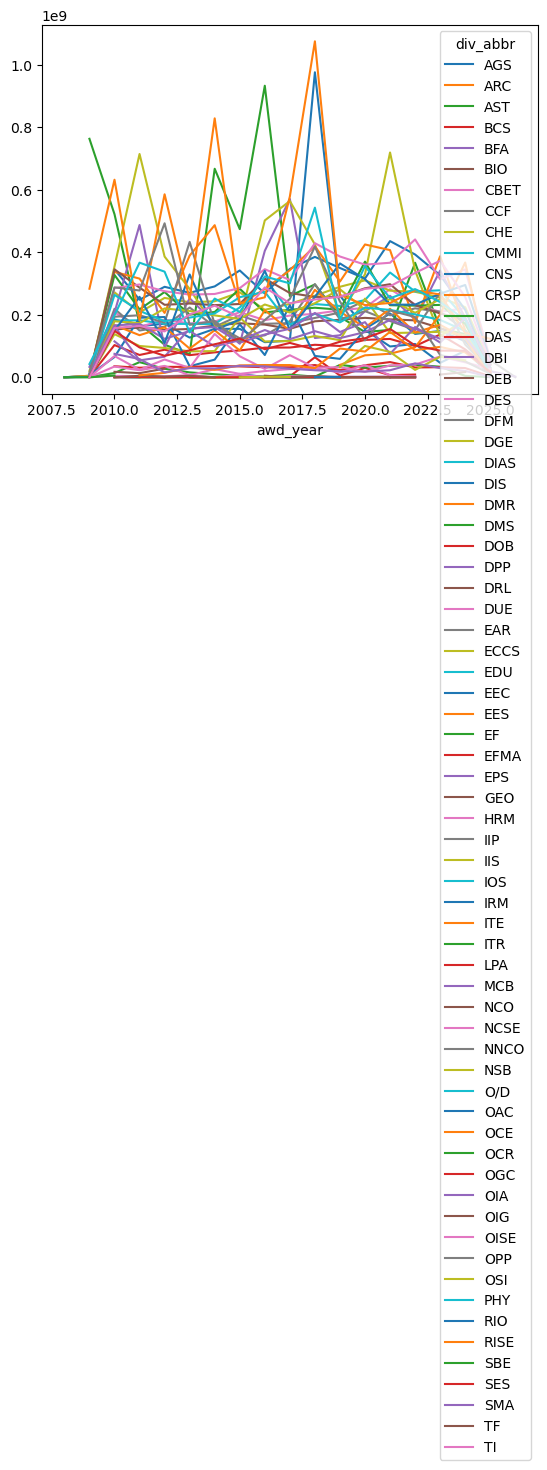

In [36]:
awards_summary_df.pivot(index='awd_year',columns='div_abbr')['sum_awd_amount'].plot()

<Axes: ylabel='div_abbr'>

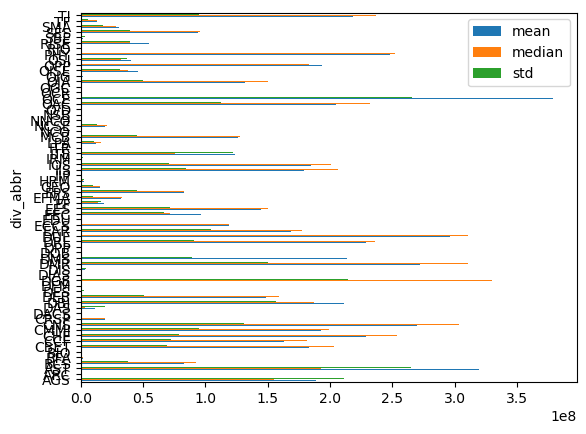

In [37]:
awards_summary_df.groupby('div_abbr')['sum_awd_amount'] \
    .agg(['mean','median','std']).plot.barh()

# Testing

In [ ]:
# find rows in awards_data where the 'awd_abstract_narration' column contains the word 'python'
awards_df[awards_df['awd_abstract_narration'].str.contains('python', na=False)].head(3)

,awd_id,agcy_id,tran_type,awd_istr_txt,awd_titl_txt,cfda_num,org_code,po_phone,po_email,po_sign_block_name,...,perf_inst.perf_st_code,perf_inst.perf_st_name,perf_inst.perf_zip_code,perf_inst.perf_ctry_code,perf_inst.perf_cong_dist,perf_inst.perf_st_cong_dist,perf_inst.perf_ctry_name,perf_inst.perf_ctry_flag,por.por_cntn,por.por_txt_cntn
1098,2335725,NSF,Grant,Standard Grant,Combining Machine Learning Explanation Methods...,47.076,11040000,7032924257,spulimoo@nsf.gov,Monisha Pulimood,...,KY,Kentucky,402920001,US,03,KY03,United States,1,NaN,NaN
3790,2348950,NSF,Grant,Standard Grant,REU Site: Psychology Research Experience Program,47.075,04010000,7032927376,jwmirand@nsf.gov,Josie Welkom Miranda,...,WI,Wisconsin,537151218,US,02,WI02,United States,1,NaN,NaN
5853,2406685,NSF,Grant,Standard Grant,RAPID: Population Assessment and Sampling of a...,47.074,08010000,7032924628,lrissler@nsf.gov,Leslie J. Rissler,...,PR,Puerto Rico,006806475,US,00,PR00,United States,1,NaN,NaN
